# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
# duplicate_mice
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_data.loc[combined_data['Mouse ID']=='g989']
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Drop duplicate mice based on Mouse ID
clean_combined_data = combined_data[combined_data['Mouse ID']!='g989']
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_combined_data["Mouse ID"].nunique()
clean_num_mice

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('mean').to_frame()
summary_stats['median'] = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['var'] = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['std'] = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['sem'] = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

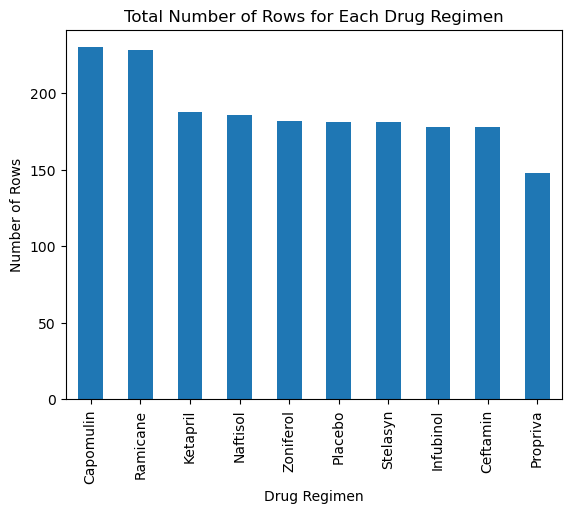

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_combined_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', title='Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

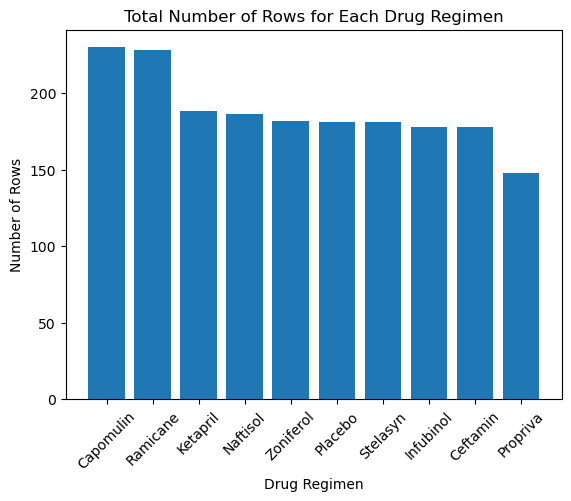

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_combined_data['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib's pyplot
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

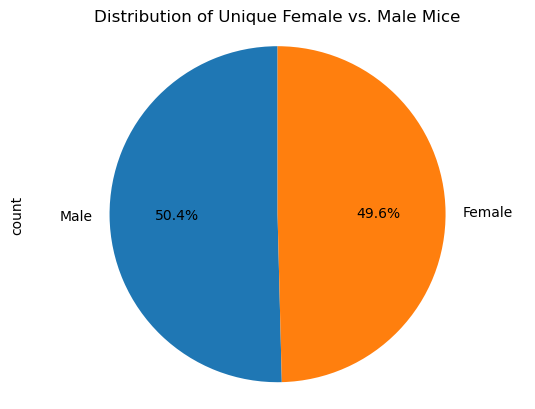

In [50]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_combined_data.drop_duplicates(subset='Mouse ID')
# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribution of Unique Female vs. Male Mice')
plt.axis('equal')
plt.show()

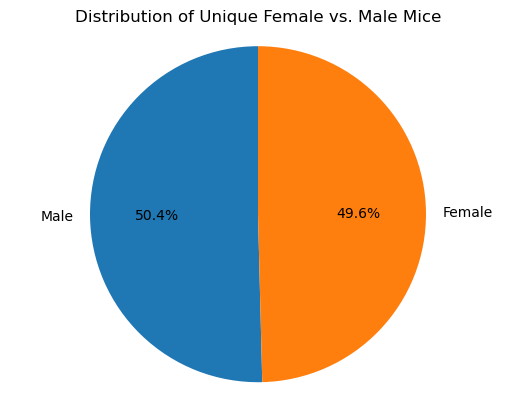

In [51]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unique Female vs. Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, clean_combined_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the data for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Ketapril','Naftisol', 'Zoniferol','Stelasyn',
                    'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Ketapril','Naftisol', 'Zoniferol','Stelasyn',
              'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")
    print(lower_q, upper_q, iqr, quartiles)


    


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
32.37735684 40.1592203 7.781863460000004 0.25    32.377357
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
31.56046955 40.65900627 9.098536719999998 0.25    31.560470
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ketapril: Series([], Name: Tumor Volume (mm3), dtype: float64)
56.72009545 69.87225079 13.152155339999993 0.25    56.720095
0.75    69.872251
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Naftisol: Series([], Name: Tumor Volume (mm3), dtype: float64)
52.07951009 69.56362076 17.484110670000007 0.25    52.079510
0.75    69.563621
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Zoniferol: Series([], Name: Tumor Volume (mm3), dtype: float64)
49.98830246 66.79415599 16.805853529999993 0.25    49.988302
0.75    66.794156
Name: Tumor 

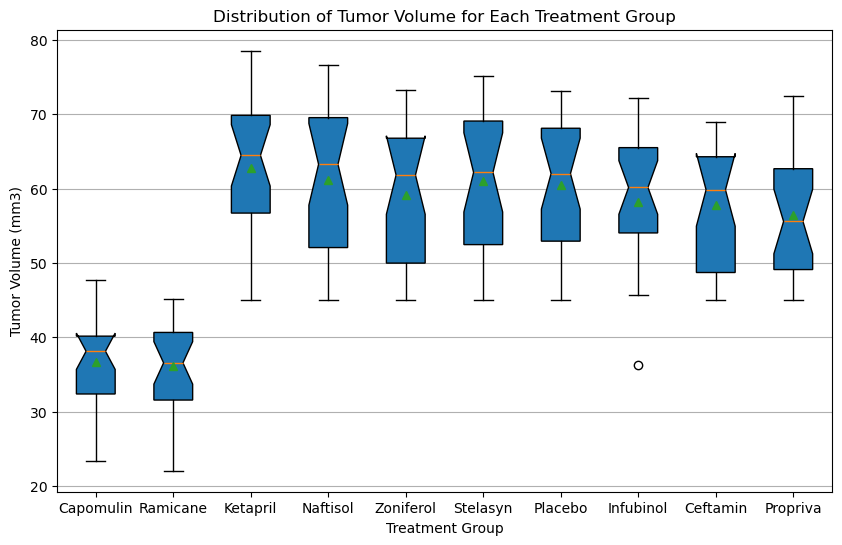

In [59]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_vol_data
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, notch=True, showmeans=True)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')
plt.show()

## Line and Scatter Plots

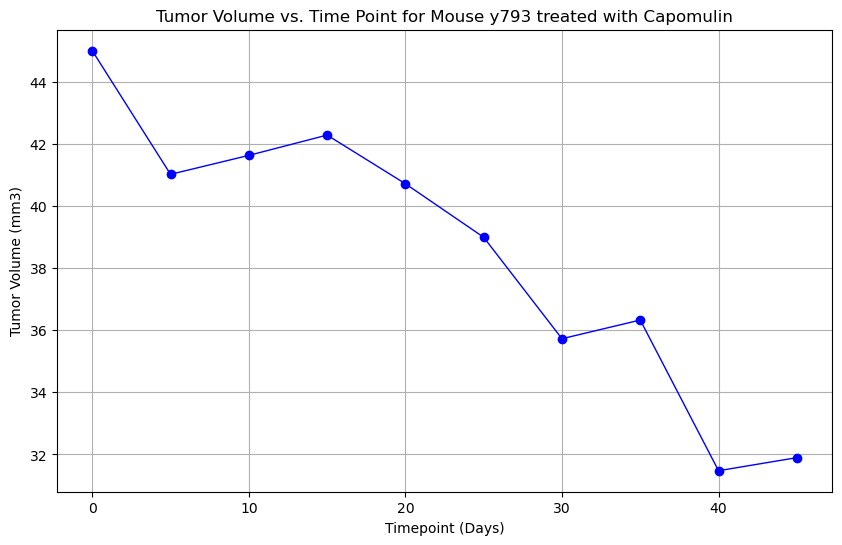

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
mouse_id = 'y793'
mouse_data = clean_combined_data[(clean_combined_data['Mouse ID'] == mouse_id) & (clean_combined_data['Drug Regimen'] == 'Capomulin')]
# Plot the tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=1)
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

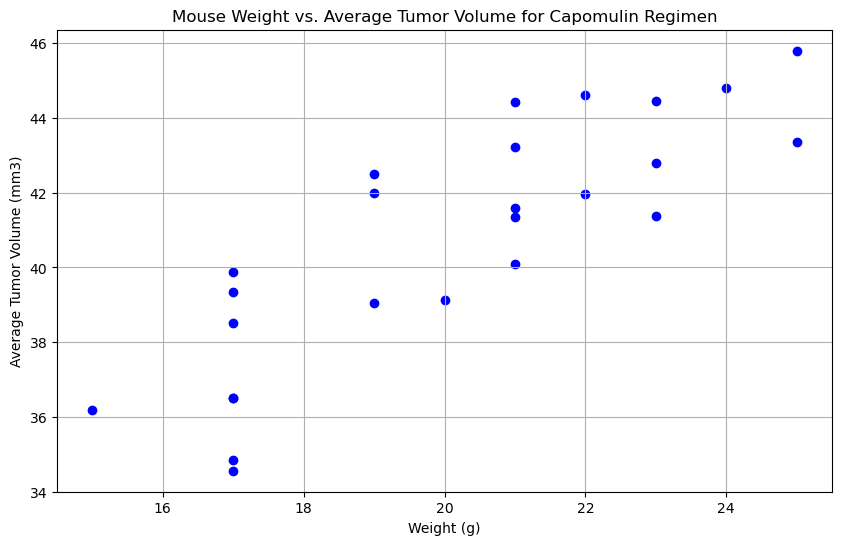

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Generate the scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

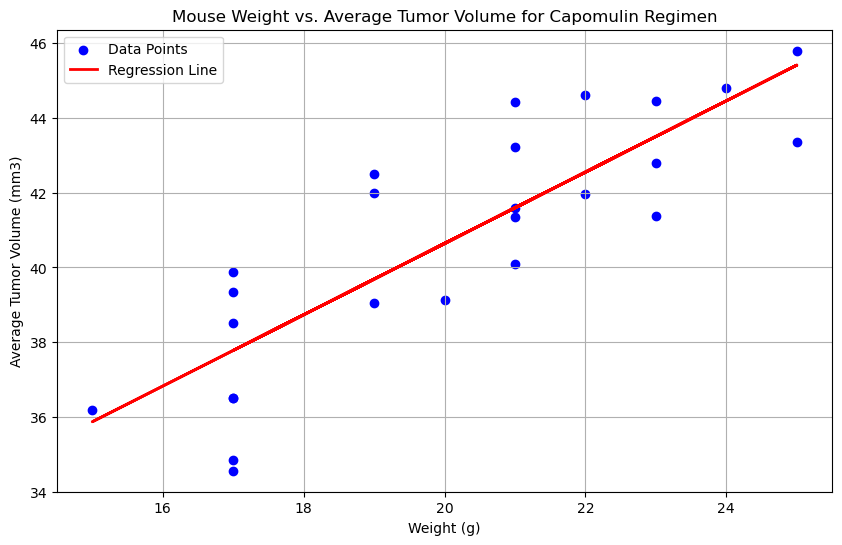

Correlation Coefficient: 0.8419363424694722


In [61]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create the regression line
regression_line = slope * merged_data['Weight (g)'] + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o', label='Data Points')
plt.plot(merged_data['Weight (g)'], regression_line, color='r', linestyle='-', linewidth=2, label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation}')